In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.signal import unit_impulse,fftconvolve
from numpy.lib.scimath import sqrt as csqrt
from scipy.signal import unit_impulse
pi = np.pi

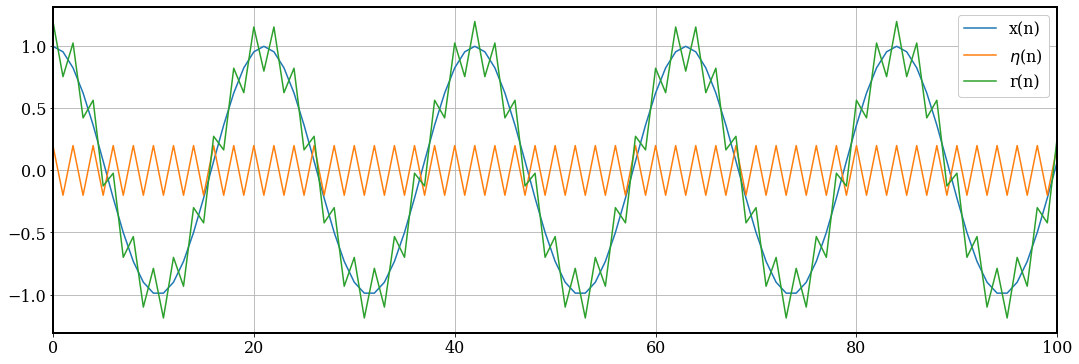

In [6]:
M = 5096
L = 128
n = np.linspace(0, M-1, M)
x_n = np.cos(2*pi*n/21)
eta_n = 0.2*(-1)**n
r_n = x_n + eta_n
h = 0.5*unit_impulse(2) + 0.5*unit_impulse(2,1) ## impulse response

figure = plt.figure(figsize = (18, 6))
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.grid(True)
plt.plot(n, x_n, label = 'x(n)')
plt.plot(n, eta_n, label = '$\eta$' + '(n)')
plt.plot(n, r_n, label = 'r(n)')
plt.xlim(0, 100)
plt.legend(loc = 'upper right', framealpha = 1)

In [7]:
N_ = int(np.floor(M/L)) ## number of blocks
r_m = np.zeros((N_ + 1, L)) ## x divided in (N_ + 1) blocks with size L

for i in range (N_):
    r_m[i,:] = r_n[i*L:(i + 1)*L]

for k in range(M % L):
    r_m[N_, k] = r_n[N_*L+k]

y_m = np.zeros((N_+1,L + len(h) -1)) ## creates each block of convolution
for i in range(r_m.shape[0]):
    y_m[i,:] = np.convolve(r_m[i,:], h)

y = np.zeros(y_m.size) ## overlapp and sum each block of convolution
for i in range(y_m.shape[0]):
    y[i*L:i*L + y_m.shape[1]] += y_m[i,:]

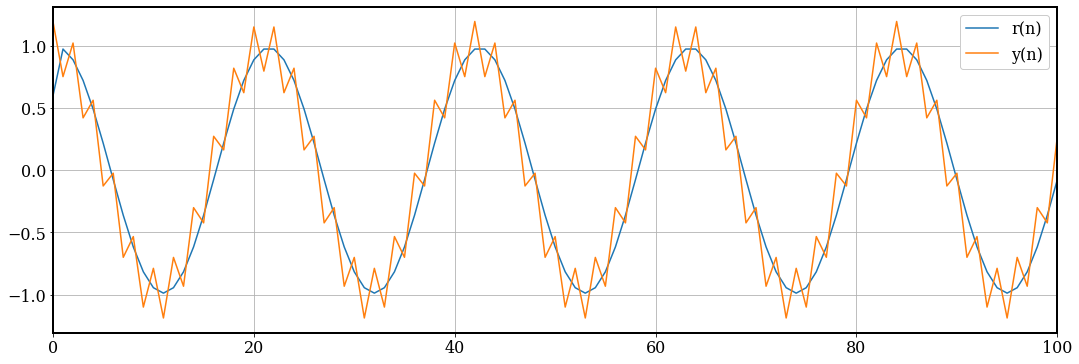

In [9]:
figure = plt.figure(figsize = (18, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
n_ = np.arange(y_m.size)
plt.plot(n_, y, label = 'r(n)')
plt.plot(n, r_n, label = 'y(n)')
plt.grid(True)
plt.xlim([0, 100])
plt.legend(loc = 'upper right', framealpha = 1)